<a href="https://colab.research.google.com/github/caxaxa/Chacha_PhD_Projects/blob/master/Incentive_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def get_IC_star(R_star,P_star):
    n = 100
    x = np.arange(0.0000001, 1,1/n )
    N = 0.5

    alphaIE = []
    for i in x:
        alphaIE.append(((-b/(gamma**2)) + a)/(i*(a+f))) #

    alphaIE = np.asarray(alphaIE)      

    alphaIB = []

    for i in x:
        alphaIB.append(((-c_b/(gamma**2)) + b)/ (i*(b+f)))  #

    alphaIB = np.asarray(alphaIB)   

    #Ploting Indiference curves

    R = []
    for i in x:
        R.append((((gamma**2)*a) +( R_star*f))/(((gamma**2)*(a+f))*i)) #

    R = np.asarray(R)  


    P = [((gamma*a) +( P_star*f))/(gamma*(a+f))]*n

    lim = int(((gamma*a) +( P_star*f))/(gamma*(a+f))*100)

    P = np.asarray(P)  

    fig, ax = plt.subplots(figsize = (5,4))

    ax.plot(x, alphaIE, linewidth=2)
    ax.plot(x, alphaIB,'--', linewidth=2)
    ax.plot(x,R,'-.',linewidth=.5 )
    ax.plot(P, x,linewidth=.5 )

    fig.add_subplot(ax)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    fig.text(0.92, 0.05, '$𝛽$')
    fig.text(0.1, 0.9, '$𝛼$')
    #fig.text(0.65, 0.08, '$𝛽~(P*) $')
    #fig.text(0.02, 0.485, '$𝛼~(R*)$')

    ax.fill_between(x[0:lim + 1], alphaIE[0:lim + 1], facecolor='salmon', alpha=0.1)
    ax.fill_between(x[lim:100], alphaIE[lim:100], facecolor='green', alpha=0.1)
    ax.fill_between( x, alphaIE , R ,facecolor='white', alpha=1,label='_nolegend_')
    ax.fill_between(x, alphaIE, R, facecolor='yellow', alpha=0.1)

    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(True)
    plt.xticks(np.arange(0,1.1,.1))
    plt.yticks(np.arange(0,1.1,.1))
    #plt.title('Indiference curves')
    plt.legend(('IC Payer', 'IC Receiver','Self-Reporting Bonus','Plea Agreement', 'Corruption Zone','Plea Bragaining','Self-Reporting'), bbox_to_anchor=(1.05, 1), loc='upper left')
 #   plt.savefig('./Plottings/ICSTAR_{}_W_{}_a_{}_b_{}_R_{}_P_{}_a_{}_b_{}_c_{}_f_{}_r_{}_p{}_ir{}_eta{}.pdf'
 #               .format(player,W_bar,str(alpha)[-1],str(beta)[-1],str(R)[-1],str(P)[-1],a,b,c_b,f,str(r)[-1],str(p)[-1],str(ir)[-1],str(eta)[-1]))
    plt.show()

In [205]:
def get_ICs(alphas):
    n = 1000
    x = np.arange(0, 1,1/n )

    #Ploting Indiference curves

    fig, ax = plt.subplots(figsize = (5,4))

    ax.plot(x, alphas, linewidth=2)

    fig.add_subplot(ax)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    fig.text(0.92, 0.05, '$𝛽$')
    fig.text(0.11, 0.9, '$𝛼$')

    ax.fill_between(x, alphas, facecolor='salmon', alpha=0.1)

    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(False)
    plt.xticks(np.arange(0,1.1,1))
    plt.yticks(np.arange(0,1.1,1))
    #plt.title('Indiference curves')
    plt.legend(('Incentive Constraint','Corruption Zone' ),loc='best', shadow=False)
    #plt.grid(True)
    # fig.text(0.18, 0.2, 'Corruption')
    # fig.text(0.5, 0.4, 'No Corruption')
 #   plt.savefig('./Plottings/ICS_{}_W_{}_a_{}_b_{}_R_{}_P_{}_a_{}_b_{}_c_{}_f_{}_r_{}_p{}_eta{}.pdf'.format(player,W_bar,str(alpha)[-1],str(beta)[-1],str(R)[-1],str(P)[-1],a,b,c_b,f,str(r)[-1],str(p)[-1],str(eta)[-1]))
    plt.show()

In [187]:
def get_b_star(gamma,alpha,beta,c,a):
  return (((gamma**2)*((1-alpha*beta)*a-alpha*beta*f)) + ((gamma**2*alpha*beta*f + c)/((gamma**2)*(1-alpha*beta))))/2

def get_y_payer(gamma,alpha,beta,f,b):
  return -b +(gamma**2)*((1-alpha*beta)*a - alpha*beta*f)

def get_y_receiver(gamma,alpha,beta,f,b,c):
  return -c +(gamma**2)*((1-alpha*beta)*b - alpha*beta*f)



In [188]:
a = 4
f = 5
c = 1
alpha = 0
beta = 0
gamma = .9



In [207]:
#Fixed point solution
# Numerical Solution
def alpha_solver(n):
  alphas = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    α = 0
    while get_y_receiver(gamma,α,beta,f,get_b_star(gamma,α,beta,c,a),c)>0:
      α += 1/n
      if α>1.01:
        break
    alphas[i] = α -1/n
  return alphas

alphas = alpha_solver(1000)

In [208]:
#CHeck if the result is the same for the receiver
# #Fixed point solution
# # Numerical Solution
# alphas = np.zeros(100)
# for i in range(0,100,1):
#   beta = i/100 
#   α = 0
#   while get_y_payer(gamma,α,beta,f,get_b_star(gamma,α,beta,c,a))>0:
#     α += .01
#     if α>1.02:
#       break
#   alphas[i] = α -0.01
  

# alphas

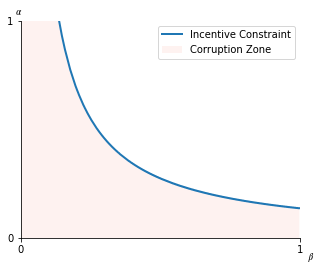

In [209]:
get_ICs(alphas)